In [1]:
%matplotlib inline
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.io import loadmat
from sklearn import decomposition

from aux import get_seg
from disp import set_font_size


EXPT_DIR = 'data/diego'
MAT_FILE = 'median_auditory_responses_wildtype.mat'
# MAT_FILE = 'median_auditory_responses_wildtype_plus_naturalsong.mat'

In [2]:
temp = loadmat(os.path.join(EXPT_DIR, MAT_FILE))['dataset']
d = dict(zip([k for k, v in temp.dtype.descr], temp[0, 0]))
print(d.keys())

dict_keys(['description', 'median_z_scored_signal_per_roi', 'median_dfof_signal_per_roi', 'timestamps', 'stimuli_index_vector', 'stimuli_name_string', 'response_type_label_per_roi', 'neuropil_index_per_roi', 'neuropil_full_names', 'fly_index_per_roi', 'sex_index_per_roi', 'sex_full_name_string'])


In [3]:
print(d['median_z_scored_signal_per_roi'].shape)  # num rois (aggregated over flies) x num timesteps
med_rsp = d['median_z_scored_signal_per_roi']

(19036, 183)


In [4]:
d['timestamps'].shape

(1, 183)

In [5]:
t_orig = d['timestamps'].flatten()
t_orig

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,
        12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,
        17. ,  17.5,  18. ,  18.5,  19. ,  19.5,  20. , -10. ,  -9.5,
        -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,
        -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5,
         0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,
        13.5,  14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,
        18. ,  18.5,  19. ,  19.5,  20. , -10. ,  -9.5,  -9. ,  -8.5,
        -8. ,  -7.5,

In [6]:
stim_index = d['stimuli_index_vector'].flatten()
stim_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [7]:
d['stimuli_name_string']

array([[array(['Pulse'], dtype='<U5')],
       [array(['Sine'], dtype='<U4')],
       [array(['White Noise'], dtype='<U11')]], dtype=object)

In [8]:
print(d['neuropil_index_per_roi'].shape)
print(np.unique(d['neuropil_index_per_roi']))
d['neuropil_index_per_roi']

(19036, 1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


array([[0],
       [1],
       [0],
       ...,
       [3],
       [0],
       [7]], dtype=uint8)

In [9]:
print(d['fly_index_per_roi'].shape)
print(np.unique(d['fly_index_per_roi']))
d['fly_index_per_roi']

(19036, 1)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 38 39 40 41 46 47]


array([[ 1],
       [ 1],
       [ 1],
       ...,
       [47],
       [47],
       [47]], dtype=uint8)

In [10]:
print(d['response_type_label_per_roi'].shape)
d['response_type_label_per_roi']

(19036, 1)


array([[13],
       [13],
       [13],
       ...,
       [18],
       [15],
       [12]], dtype=uint8)

In [11]:
d['neuropil_index_per_roi'].flatten()[:20]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
      dtype=uint8)

In [12]:
d['fly_index_per_roi'].flatten()[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [13]:
print(d['neuropil_full_names'].shape)
d['neuropil_full_names']

(41, 1)


array([[array(['AMMC'], dtype='<U4')],
       [array(['SAD'], dtype='<U3')],
       [array(['GNG'], dtype='<U3')],
       [array(['WED'], dtype='<U3')],
       [array(['AVLP'], dtype='<U4')],
       [array(['PVLP'], dtype='<U4')],
       [array(['PLP'], dtype='<U3')],
       [array(['AOTU'], dtype='<U4')],
       [array(['AL'], dtype='<U2')],
       [array(['MB_VL'], dtype='<U5')],
       [array(['MB_ML'], dtype='<U5')],
       [array(['MB_PED'], dtype='<U6')],
       [array(['MB_CA'], dtype='<U5')],
       [array(['LH'], dtype='<U2')],
       [array(['EB'], dtype='<U2')],
       [array(['FB'], dtype='<U2')],
       [array(['PB'], dtype='<U2')],
       [array(['NO'], dtype='<U2')],
       [array(['BU'], dtype='<U2')],
       [array(['LAL'], dtype='<U3')],
       [array(['SLP'], dtype='<U3')],
       [array(['SIP'], dtype='<U3')],
       [array(['SMP'], dtype='<U3')],
       [array(['CRE'], dtype='<U3')],
       [array(['SCL'], dtype='<U3')],
       [array(['ICL'], dtype='<U3')],
      

In [14]:
stims = [None] + [stim[0] for stim in d['stimuli_name_string'].flatten()]
n_stim = len(stims)-1
stims

[None, 'Pulse', 'Sine', 'White Noise']

In [15]:
bds = [None]

for istim in range(1, 4):
    segs, bds_seg = get_seg(stim_index==istim, min_gap=1)
    bds.append(bds_seg[0])
    
print(bds)

[None, array([20, 41]), array([ 81, 102]), array([142, 163])]


In [16]:
flies = np.unique(d['fly_index_per_roi'])
mflys = [(d['fly_index_per_roi'] == fly).flatten() for fly in flies]

expts = []

for fly, mfly in zip(flies, mflys):
    print(f'Fly {fly}: {mfly.sum()} rois')
    expts.append(med_rsp[mfly, :])
    
print()

for fly, expt in zip(flies, expts):
    print(f'Fly {fly}: {expt.shape}')

Fly 1: 854 rois
Fly 2: 370 rois
Fly 3: 1573 rois
Fly 4: 743 rois
Fly 5: 932 rois
Fly 6: 464 rois
Fly 7: 398 rois
Fly 8: 326 rois
Fly 9: 362 rois
Fly 10: 193 rois
Fly 11: 696 rois
Fly 12: 656 rois
Fly 13: 422 rois
Fly 14: 306 rois
Fly 15: 678 rois
Fly 16: 1276 rois
Fly 17: 277 rois
Fly 18: 651 rois
Fly 19: 393 rois
Fly 20: 458 rois
Fly 21: 257 rois
Fly 22: 757 rois
Fly 23: 94 rois
Fly 24: 337 rois
Fly 25: 486 rois
Fly 26: 470 rois
Fly 27: 177 rois
Fly 38: 210 rois
Fly 39: 697 rois
Fly 40: 382 rois
Fly 41: 948 rois
Fly 46: 729 rois
Fly 47: 1464 rois

Fly 1: (854, 183)
Fly 2: (370, 183)
Fly 3: (1573, 183)
Fly 4: (743, 183)
Fly 5: (932, 183)
Fly 6: (464, 183)
Fly 7: (398, 183)
Fly 8: (326, 183)
Fly 9: (362, 183)
Fly 10: (193, 183)
Fly 11: (696, 183)
Fly 12: (656, 183)
Fly 13: (422, 183)
Fly 14: (306, 183)
Fly 15: (678, 183)
Fly 16: (1276, 183)
Fly 17: (277, 183)
Fly 18: (651, 183)
Fly 19: (393, 183)
Fly 20: (458, 183)
Fly 21: (257, 183)
Fly 22: (757, 183)
Fly 23: (94, 183)
Fly 24: (337, 18

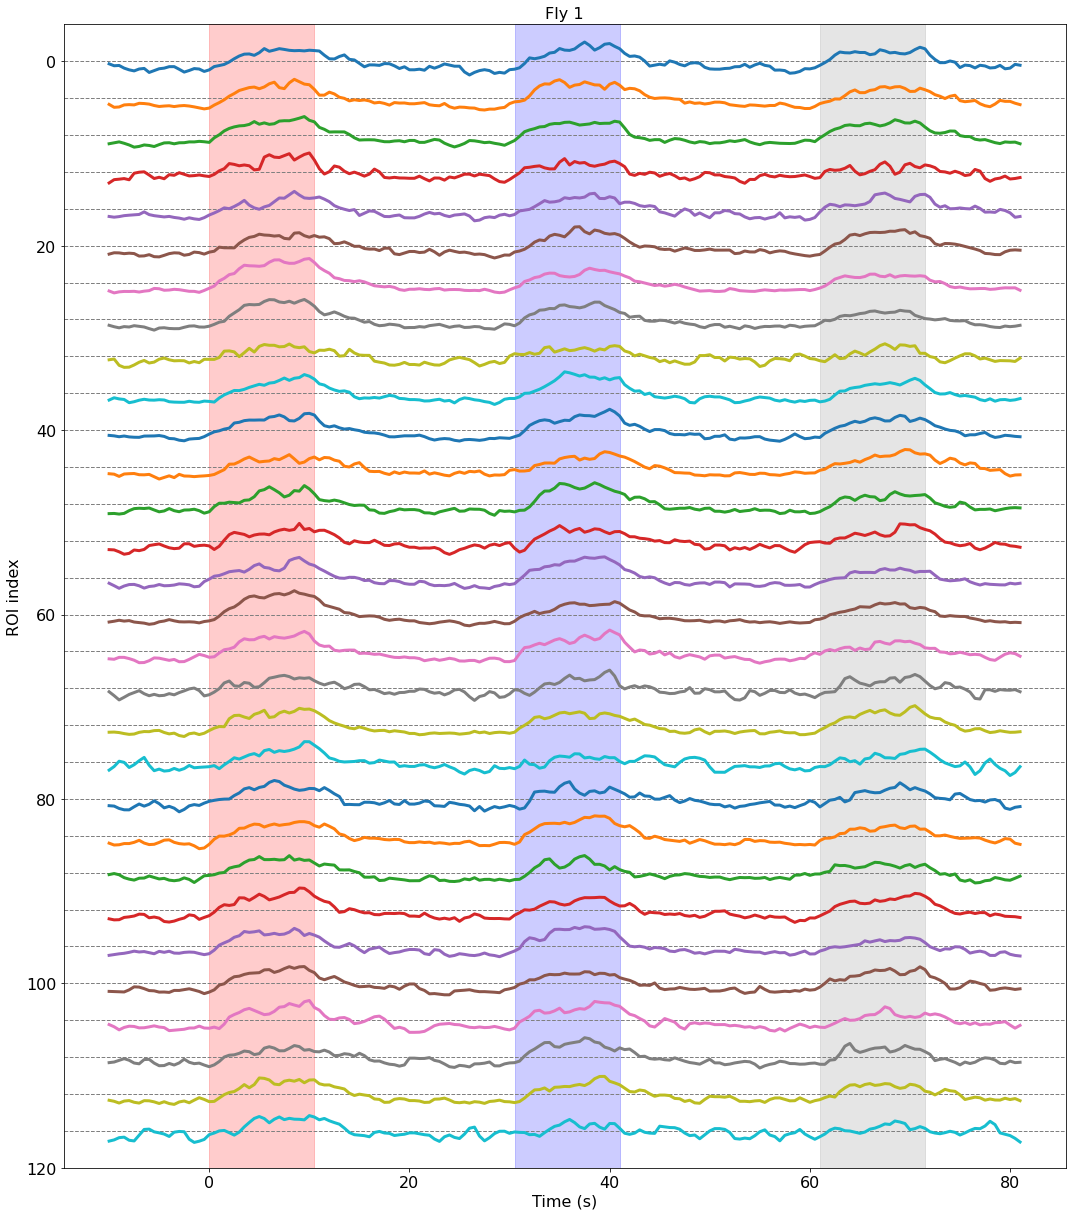

In [17]:
ifly = 0
t = -10 + np.arange(len(d['timestamps'].flatten()))*.5

fig, ax = plt.subplots(1, 1, figsize=(15, 17), tight_layout=True)
for ctr in range(30):
    ax.axhline(4*ctr, lw=1, ls='--', c='gray')
    ax.plot(t, -expts[ifly][ctr, :] + 4*ctr, lw=3)

colors = [None, 'r', 'b', 'gray', 'm']
for cstim, stim in enumerate(stims[1:], 1):
    start, end = bds[cstim]
    ax.axvspan(t[start], t[end], color=colors[cstim], alpha=.2)
    
ax.set_ylim(4*30, -4)
ax.set_xlabel('Time (s)')
ax.set_ylabel('ROI index')
ax.set_title(f'Fly {flies[ifly]}')

set_font_size(ax, 16)